# Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

## Haberman dataset

Toy  Dataset: Iris Dataset: [https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival]
* 2 types of people who had undergone surgery for breast cancer
* group 1: survived and group 2: died
* each person is defined by 3 features:
 1. Age of patient at time of operation (numerical) 
 2. Patient's year of operation (year - 1900, numerical) 
 3. Number of positive axillary nodes detected (numerical) 
 4. Survival status (class attribute) 
    - 1 = the patient survived 5 years or longer 
    - 2 = the patient died within 5 yea
*  Objective: Classify a new patient whether he/she would survive given the 3 features.


In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings


warnings.filterwarnings("ignore")
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [122]:
#how many data-points and features?
print (haberman.shape)

(306, 4)


In [123]:
#What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [124]:
# Quick look at the data
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [125]:
#How many data points for each class are present? 
haberman["status"].value_counts()


1    225
2     81
Name: status, dtype: int64

In [126]:
haberman['status'] = haberman['status'].map({1:'survived',2:'died'})

1. haberman is not a balanced dataset as the number of data points for one class is 81 and for 225 for the other class.

# (3.2) 2-D Scatter Plot

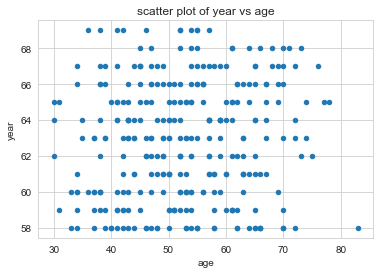

In [127]:
#2-D scatter plot:

haberman.plot(kind='scatter', x='age', y='year') ;
plt.title('scatter plot of year vs age')
plt.show()

#no clear trend or a separation between classes observed

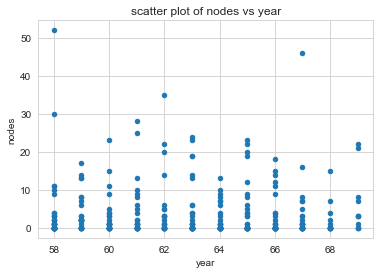

In [128]:
haberman.plot(kind='scatter', x='year', y='nodes') ;
plt.title('scatter plot of nodes vs year')
plt.show()

#no clear trend or a separation between classes observed

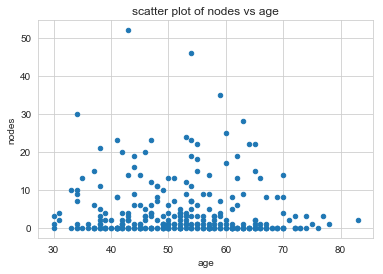

In [129]:
haberman.plot(kind='scatter', x='age', y='nodes', ) ;
plt.title('scatter plot of nodes vs age')
plt.show()

#there is some separation but let's make it colorful!

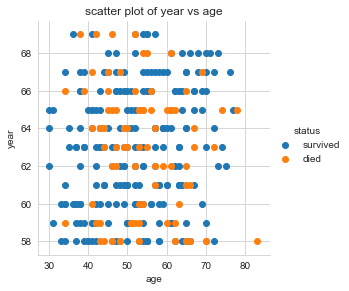

In [130]:
# 2-D Scatter plot with color-coding for each patient type/class.
 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('scatter plot of year vs age')
plt.show();


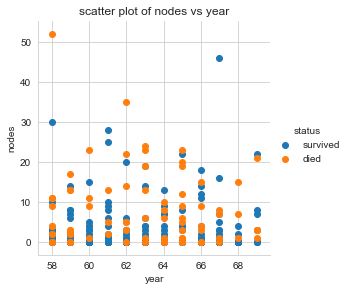

In [131]:
# 2-D Scatter plot with color-coding for each patient type/class.
 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title('scatter plot of nodes vs year')
plt.show();

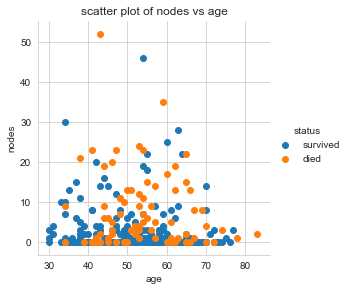

In [132]:
# 2-D Scatter plot with color-coding for each patient type/class.
 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('scatter plot of nodes vs age')
plt.show();

**Observation(s):**
1. Using age and nodes we can see some groups but there is no clear cluster.
2. Separating survived from died is hard as they have considerable overlap.

#  (3.3) Pair-plot

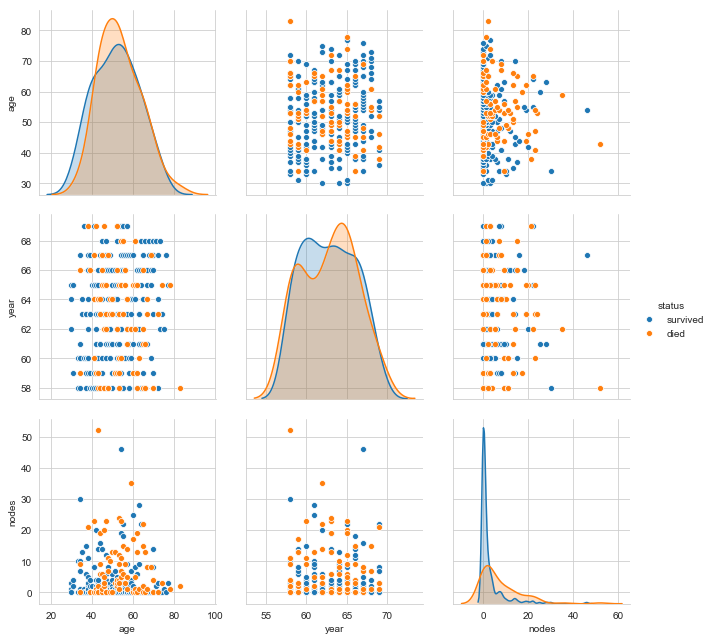

In [134]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3);
plt.show()


**Observations**
1. based on age and year, the two classes are highly overlapped.
2. the degree of overlap is lower in the two classes based on nodes.
3. we might be able to use 'if-else' conditions to build a simple model to classify the patient types

# (3.4) Histogram, PDF, CDF

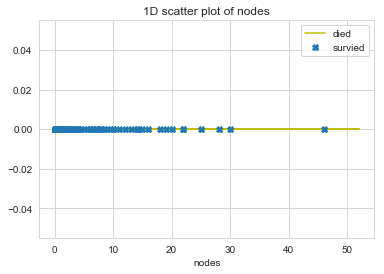

In [135]:
#1-D scatter plot of nodes
import numpy as np
haberman_survaived = haberman.loc[haberman["status"] == 'survived'];
haberman_died = haberman.loc[haberman["status"] == 'died'];

plt.plot(haberman_died["nodes"], np.zeros_like(haberman_died['nodes']), 'Y', label='died')

plt.plot(haberman_survaived["nodes"], np.zeros_like(haberman_survaived['nodes']), 'X', label='survied')

plt.xlabel('nodes')
plt.title('1D scatter plot of nodes')
plt.legend()

plt.show()

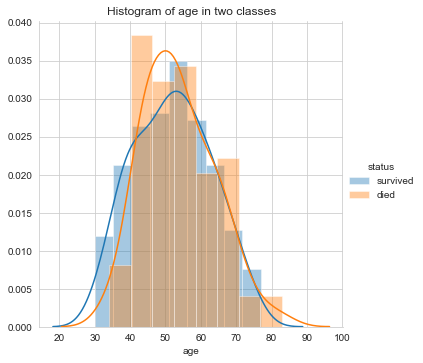

In [136]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of age in two classes')
plt.show();



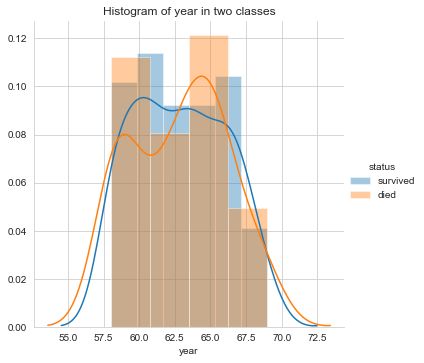

In [137]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram of year in two classes')
plt.show();

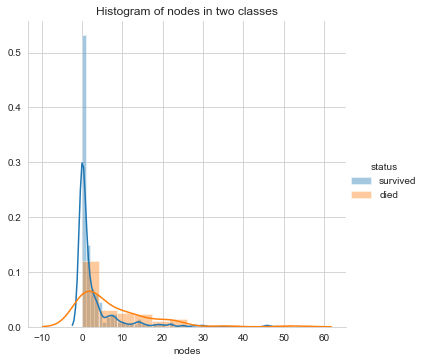

In [138]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of nodes in two classes')
plt.show();


**Observations**
1. based on nodes we can say that if nodes are greater than 30 -> class 2 (died). we still have very small probability for class 1 but it is less than 5%.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


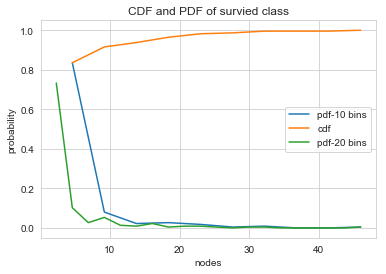

In [139]:
#Plot CDF of nodes for survied

counts, bin_edges = np.histogram(haberman_survaived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-10 bins');
plt.plot(bin_edges[1:], cdf, label='cdf')


counts, bin_edges = np.histogram(haberman_survaived['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf, label='pdf-20 bins');
plt.title('CDF and PDF of survied class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show();


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


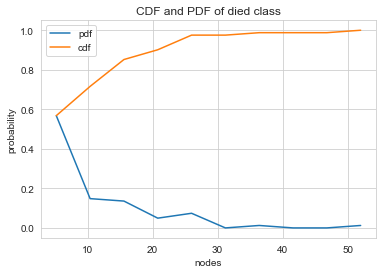

In [140]:
#Plot CDF of nodes for died

counts, bin_edges = np.histogram(haberman_died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')

plt.title('CDF and PDF of died class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


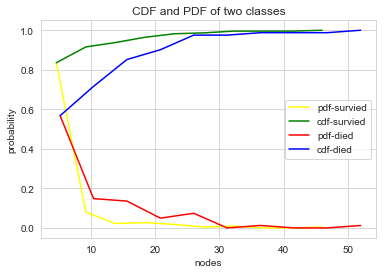

In [141]:
# Plots of CDF of nodes for various types of patients

# survied
counts, bin_edges = np.histogram(haberman_survaived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, color='yellow', label='pdf-survied')
plt.plot(bin_edges[1:], cdf, color='green',  label='cdf-survied')


# died
counts, bin_edges = np.histogram(haberman_died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, color='red', label='pdf-died')
plt.plot(bin_edges[1:], cdf, color='blue', label='cdf-died')
plt.legend()



plt.title('CDF and PDF of two classes')
plt.xlabel('nodes')
plt.ylabel('probability')

plt.show();

**Observations**
1. based on CDFs we can say that if number of nodes is less than 5 there is 82% chance that it is class 1
    whereas it is only 58% that it belongs to class 2. 

# (3.5) Mean, Variance and Std-dev

In [34]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_survaived["nodes"]))
#Mean with an outlier.
# print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(haberman_died["nodes"]))
# print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(haberman_survaived["nodes"]))
print(np.std(haberman_died["nodes"]))
# print(np.std(iris_versicolor["petal_length"]))





Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412138
9.128776076761635


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [83]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_survaived["nodes"]))

print(np.median(haberman_died["nodes"]))



print("\nQuantiles:")
print(np.percentile(haberman_survaived["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_died["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_survaived["nodes"],90))
print(np.percentile(haberman_died["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_survaived["nodes"]))
print(robust.mad(haberman_died["nodes"]))




Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# (3.7) Box plot and Whiskers

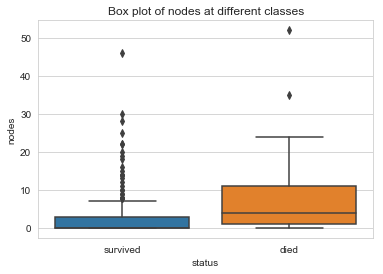

In [100]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Box plot of nodes at different classes')
plt.show()

# (3.8) Violin plots

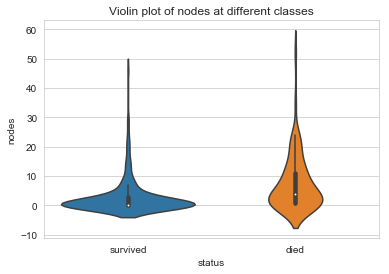

In [101]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title('Violin plot of nodes at different classes')
plt.show()

# (3.9) Summarizing plots in english

1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2. There is no clear way to seperate the two classes based on the 3 features.
3. Based on "nodes" we are able to provide a simple 'if-else-=' model to distinguish the 2 classes but 
    it only works for large number of nodes or very small number of nodes.
4. As we can see from the Box plot and Violin plot, the class 1 is more dense in terms of nodes. most of people who survived had 1-10 nodes.
5. On the other hand class 2 is more spread and the dead patients had nodes in a wide range

# (3.11) Multivariate probability density, contour plot.


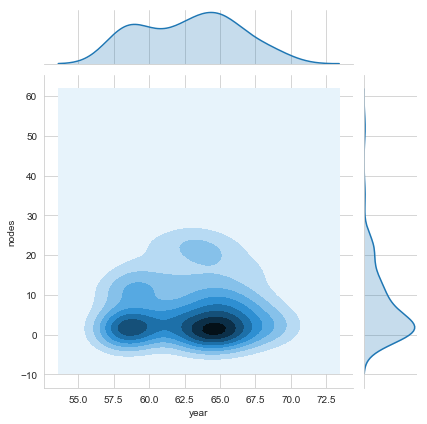

In [118]:
#2D Density plot, contors-plot
sns.jointplot(x="year", y="nodes", data=haberman_died, kind="kde");
plt.show();


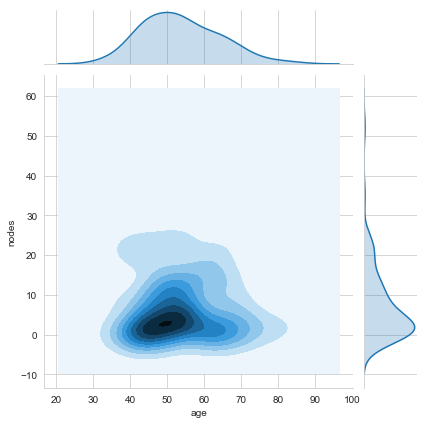

In [119]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=haberman_died, kind="kde");
plt.show();